<a href="https://colab.research.google.com/github/Letycia-Locha/ecommerce_analysis/blob/main/Ecommerce_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

instalando e importando bibliotecas

In [ ]:
!pip install kagglehub pandas numpy matplotlib plotly -q

In [ ]:
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib as mtp
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importando base de dados Kaggle:

##Brazilian E-Commerce Public Dataset by Olist

In [ ]:
import kagglehub
import os
import shutil

target_drive_path = "/content/drive/MyDrive/Data Science/Projeto_graficos_collab/"
os.makedirs(target_drive_path, exist_ok=True)

# Download latest version. In Colab, kagglehub often caches to /kaggle/input.
# The 'path' argument is for downloading specific parts *of* the dataset, not the destination for the whole dataset.
kaggle_cache_path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print(f"Dataset downloaded to Kaggle cache path: {kaggle_cache_path}")

# Copy the contents from the Kaggle cache path to the desired Google Drive path
print(f"Copying files from {kaggle_cache_path} to {target_drive_path}...")
for item in os.listdir(kaggle_cache_path):
    s = os.path.join(kaggle_cache_path, item)
    d = os.path.join(target_drive_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print(f"Dataset files are now available in: {target_drive_path}")

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Dataset downloaded to Kaggle cache path: /kaggle/input/brazilian-ecommerce
Copying files from /kaggle/input/brazilian-ecommerce to /content/drive/MyDrive/Data Science/Projeto_graficos_collab/...
Dataset files are now available in: /content/drive/MyDrive/Data Science/Projeto_graficos_collab/


##Explorando os dados

1. Qual época do ano mais fatura?
2. Qual é o estado Brasileiro que mais compra?
3. Qual a categoria de produto mais vendida?
4. Quais são os 5 tipos de itens mais vendidos em dezembro?

In [ ]:
import pandas as pd

# Carregar as tabelas que discutimos
# Ajusta o caminho '/content/...' se os teus arquivos estiverem numa pasta diferente
pedidos = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto_graficos_collab/olist_order_items_dataset.csv')
data = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto_graficos_collab/olist_orders_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto_graficos_collab/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto_graficos_collab/olist_products_dataset.csv')
clientes = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto_graficos_collab/olist_customers_dataset.csv')

# Vamos dar uma espreitadela na tabela de Itens para ver a "cola"
print("--- Tabela de Itens (A Ponte) ---")
display(items.head())

--- Tabela de Itens (A Ponte) ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
pedidos.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
items.head()

,id_pedido,id_produto_pedido,id_produto,id_venda,data_venda,preço,frete
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#Avaliando colunas relevantes de acordo com nossas perguntas:

## 🔎 Análise de Perguntas e Colunas Essenciais

### 1. Qual época do ano mais fatura?

| Tabela Principal | Colunas Chave | Porquê | Ligação Principal |
| :--- | :--- | :--- | :--- |
| **`data`** (olist\_orders\_dataset) | `order_purchase_timestamp` | Determinar a data da compra. | `order_id` (com `pedidos`) |
| **`pedidos`** (olist\_order\_items\_dataset) | `price` | Valor monetário de cada item. | `order_id` (com `data`) |

---

### 2. Qual estado brasileiro mais compra?

Esta pergunta requer a combinação de informações sobre **quem** (cliente) e **o quê** (pedido).

| Tabela Principal | Colunas Chave | Porquê | Ligação Principal |
| :--- | :--- | :--- | :--- |
| **`customers`** (olist\_customers\_dataset) | `customer_state` | O estado do cliente. | `customer_id` (com `data`) |
| **`data`** (olist\_orders\_dataset) | `order_id` | Para contar o número de pedidos. | `customer_id` (com `customers`) |

---

### 3. Qual categoria de produto é a mais vendida?

| Tabela Principal | Colunas Chave | Porquê | Ligação Principal |
| :--- | :--- | :--- | :--- |
| **`items`** (olist\_order\_items\_dataset) | `order_item_id` | Contador de itens vendidos. | `product_id` (com `products`) |
| **`products`** (olist\_products\_dataset) | `product_category_name` | Nome da categoria do produto. | `product_id` (com `items`) |

---

### 4. Qual o valor médio e o tempo de entrega por região?

| Tabela Principal | Colunas Chave | Porquê | Ligação Principal |
| :--- | :--- | :--- | :--- |
| **`data`** (olist\_orders\_dataset) | `order_delivered_customer_date` | Data de recebimento. | **Várias ligações necessárias** |
| | `order_purchase_timestamp` | Data do pedido. | |
| **`items`** (olist\_order\_items\_dataset) | `price` | Para o valor médio (faturação). | |
| **`customers`** (olist\_customers\_dataset) | `customer_state` | Para agrupar por região/estado. | |

##Unindo as tabelas

###Pergunta 1 - Qual época do ano mais fatura?

In [ ]:
# Unindo as tabelas de pedidos (data) e itens (pedidos)
df_epoca_faturamento = data.merge(
    pedidos[['order_id', 'price']], # Pegamos apenas as colunas de ligação e valor da tabela 'pedidos'
    on='order_id',
    how='left'
)

print("--- Primeiras 5 linhas do DataFrame df_epoca_faturamento: ---")
print(df_epoca_faturamento[['order_id', 'order_purchase_timestamp', 'price']].head())

--- Primeiras 5 linhas do DataFrame df_epoca_faturamento: ---
                           order_id order_purchase_timestamp   price
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   29.99
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37  118.70
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49  159.90
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   45.00
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   19.90


In [ ]:
df_epoca_faturamento['Mes_Ano'] = pd.to_datetime(df_epoca_faturamento['Mes_Ano'])

df_epoca_faturamento['Trimestre_Periodo'] = df_epoca_faturamento['Mes_Ano'].dt.to_period('Q')

# Criar a coluna de Rótulo: Pega o INÍCIO do período e formata como MM/AAAA
df_epoca_faturamento['Rotulo_Trimestre'] = df_epoca_faturamento['Trimestre_Periodo'].dt.start_time.dt.strftime('%m/%Y')

print("--- Verificação da Nova Coluna Rotulo_Trimestre: ---")
print(df_epoca_faturamento[['Rotulo_Trimestre', 'price']].head())

--- Verificação da Nova Coluna Rotulo_Trimestre: ---
  Rotulo_Trimestre   price
0          10/2017   29.99
1          07/2018  118.70
2          07/2018  159.90
3          10/2017   45.00
4          01/2018   19.90


In [ ]:
faturamento_trimestral = df_epoca_faturamento.groupby(['Trimestre_Periodo', 'Rotulo_Trimestre'])['price'].sum().reset_index()

faturamento_trimestral.columns = ['Trimestre_Periodo', 'Rotulo_Trimestre', 'Faturamento_Total']

# Ordenar explicitamente pelo objeto Trimestre_Periodo para garantir que a linha siga a ordem cronológica
faturamento_trimestral = faturamento_trimestral.sort_values(by='Trimestre_Periodo')

print("\n--- Faturamento Total por Trimestre (Rotulado): ---")
print(faturamento_trimestral.head())


--- Faturamento Total por Trimestre (Rotulado): ---
  Trimestre_Periodo Rotulo_Trimestre  Faturamento_Total
0            2016Q3          07/2016             267.36
1            2016Q4          10/2016           49518.56
2            2017Q1          01/2017          741960.19
3            2017Q2          04/2017         1299036.97
4            2017Q3          07/2017         1696404.85


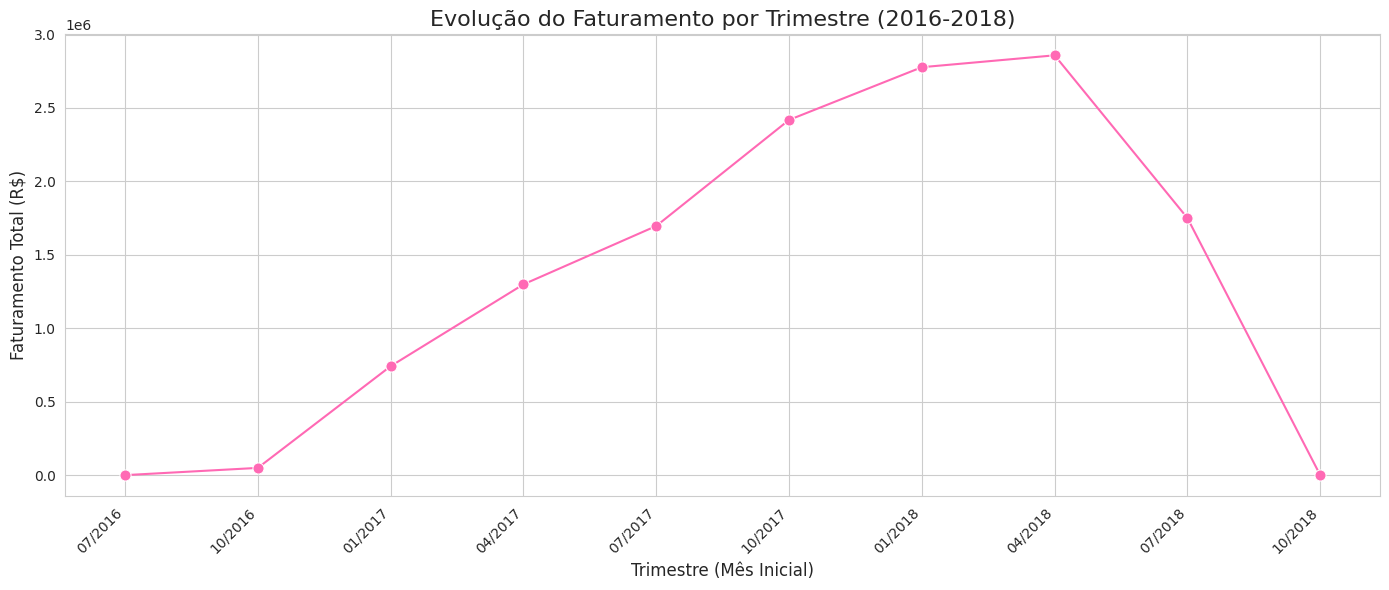

In [ ]:
import seaborn as sns

# Configurações iniciais
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Definição da cor e espessura
cor_rosa_pink = '#FF69B4' # Código hexadecimal comum para Deep Pink/Hot Pink
espessura_linha = 1.5      # Linha fina

# 1. Criar o gráfico de linhas (sns.lineplot)
sns.lineplot(
    x='Rotulo_Trimestre',
    y='Faturamento_Total',
    data=faturamento_trimestral,
    marker='o',             # Mantém os marcadores circulares
    color=cor_rosa_pink,    # Define a cor da linha e dos marcadores (por padrão, usa a cor da linha)
    linewidth=espessura_linha, # Linha fina
    markersize=8            # Mantém um tamanho de bolinha padrão (você pode ajustar este valor)
)

# 2. Adicionar Título e Rótulos
plt.title('Evolução do Faturamento por Trimestre (2016-2018)', fontsize=16)
plt.xlabel('Trimestre (Mês Inicial)', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 3. Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

###Pergunta 2. Qual o estado brasileiro que mais comprou nos anos de 2016 a 2018?

In [ ]:
# Unindo os DataFrames para ligar o ID do pedido ao Estado do cliente
df_estado_compra = data.merge(
    customers[['customer_id', 'customer_state']], # Selecionamos apenas as colunas essenciais de 'customers'
    on='customer_id', # A chave de ligação é o customer_id
    how='left'
)

print("--- Verificação das Colunas (Estado e Data): ---")
print(df_estado_compra[['order_purchase_timestamp', 'customer_state']].head())

--- Verificação das Colunas (Estado e Data): ---
  order_purchase_timestamp customer_state
0      2017-10-02 10:56:33             SP
1      2018-07-24 20:41:37             BA
2      2018-08-08 08:38:49             GO
3      2017-11-18 19:28:06             RN
4      2018-02-13 21:18:39             SP


In [ ]:
# Converter a coluna de data para o formato datetime
df_estado_compra['order_purchase_timestamp'] = pd.to_datetime(df_estado_compra['order_purchase_timestamp'])

# Filtrar para os anos de 2016, 2017 e 2018
df_estado_compra['Ano'] = df_estado_compra['order_purchase_timestamp'].dt.year
df_estado_compra_filtrado = df_estado_compra[df_estado_compra['Ano'].isin([2016, 2017, 2018])]

In [ ]:
# Agrupar pelo estado e contar o número de pedidos (usando a contagem de order_id)
contagem_por_estado = df_estado_compra_filtrado.groupby('customer_state')['order_id'].count().reset_index()

# Renomear as colunas para clareza
contagem_por_estado.columns = ['Estado', 'Total_Pedidos']

# Ordenar do estado que mais comprou para o que menos comprou
contagem_por_estado = contagem_por_estado.sort_values(by='Total_Pedidos', ascending=False)

print("\n--- Top 10 Estados por Número de Pedidos (2016-2018): ---")
print(contagem_por_estado.head(10))


--- Top 10 Estados por Número de Pedidos (2016-2018): ---
   Estado  Total_Pedidos
25     SP          41746
18     RJ          12852
10     MG          11635
22     RS           5466
17     PR           5045
23     SC           3637
4      BA           3380
6      DF           2140
7      ES           2033
8      GO           2020


In [ ]:
media_nacional_por_estado = contagem_por_estado['Total_Pedidos'].mean()

print(f"Média Nacional de Pedidos por Estado: {media_nacional_por_estado:.2f}")

top_10_estados = contagem_por_estado.head(10).copy()
top_10_estados['Media_Nacional'] = media_nacional_por_estado

df_comparacao = top_10_estados.melt(
    id_vars='Estado',
    value_vars=['Total_Pedidos', 'Media_Nacional'],
    var_name='Tipo_Contagem',
    value_name='Contagem'
)

print("\n--- Estrutura dos Dados para o Gráfico Agrupado (Primeiras 5 linhas): ---")
print(df_comparacao.head())

Média Nacional de Pedidos por Estado: 3683.00

--- Estrutura dos Dados para o Gráfico Agrupado (Primeiras 5 linhas): ---
  Estado  Tipo_Contagem  Contagem
0     SP  Total_Pedidos   41746.0
1     RJ  Total_Pedidos   12852.0
2     MG  Total_Pedidos   11635.0
3     RS  Total_Pedidos    5466.0
4     PR  Total_Pedidos    5045.0


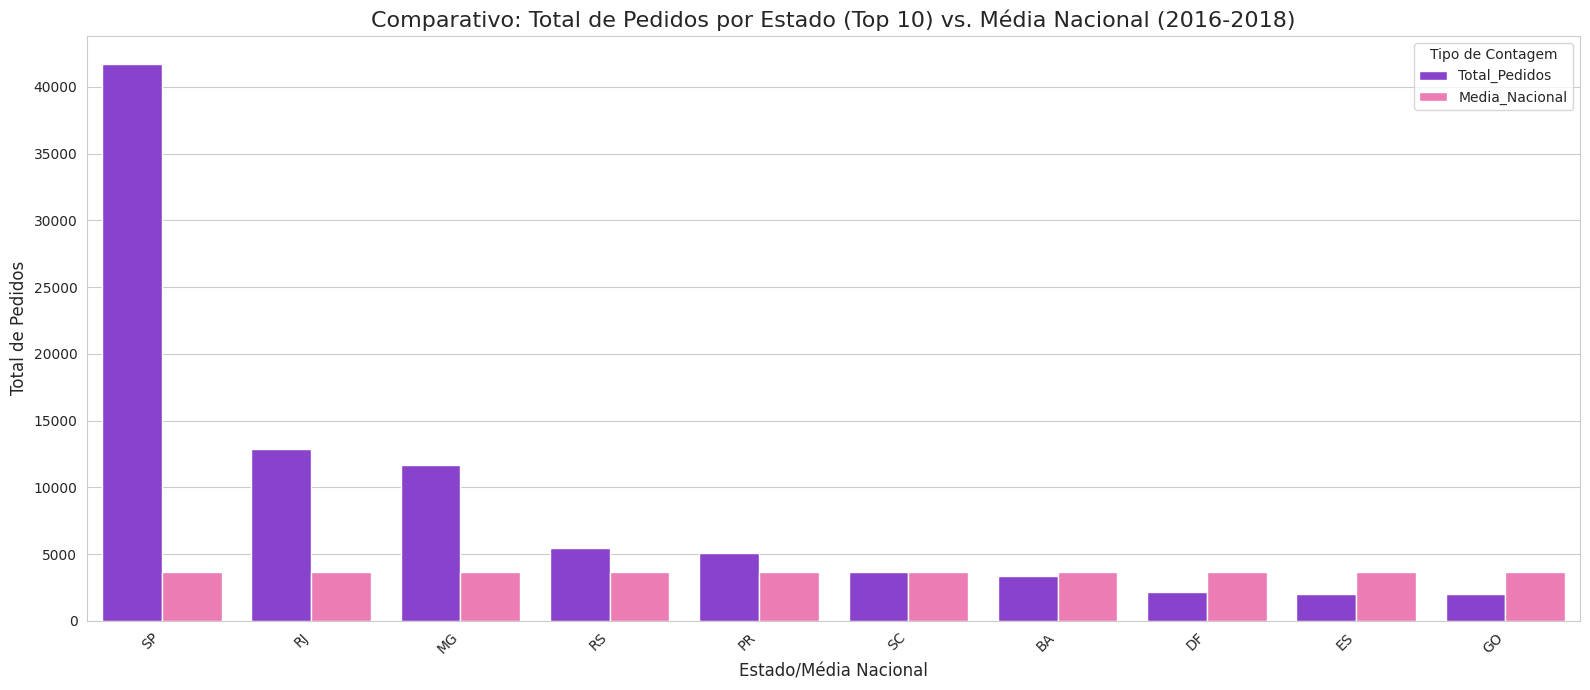

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 7))

sns.barplot(
    x='Estado',
    y='Contagem',
    hue='Tipo_Contagem',
    data=df_comparacao,
    palette={'Total_Pedidos': '#8A2BE2', 'Media_Nacional': '#FF69B4'}
)

plt.title('Comparativo: Total de Pedidos por Estado (Top 10) vs. Média Nacional (2016-2018)', fontsize=16)
plt.xlabel('Estado/Média Nacional', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Contagem', loc='upper right')
plt.tight_layout()
plt.show()

###Pergunta 3. Qual a categoria de produtos mais vendida?

In [ ]:
# Unindo os DataFrames de itens de pedido e produtos
# Selecionamos apenas a contagem do item e o ID do produto da tabela 'pedidos'
df_vendas_categoria = pedidos[['order_item_id', 'product_id']].merge(
    products[['product_id', 'product_category_name']], # Pegamos apenas o ID e o nome da categoria da tabela 'products'
    on='product_id', # A chave de ligação é o product_id
    how='left'
)

print("--- Verificação das Colunas (ID do Produto e Categoria): ---")
print(df_vendas_categoria.head())

--- Verificação das Colunas (ID do Produto e Categoria): ---
   order_item_id                        product_id product_category_name
0              1  4244733e06e7ecb4970a6e2683c13e61            cool_stuff
1              1  e5f2d52b802189ee658865ca93d83a8f              pet_shop
2              1  c777355d18b72b67abbeef9df44fd0fd      moveis_decoracao
3              1  7634da152a4610f1595efa32f14722fc            perfumaria
4              1  ac6c3623068f30de03045865e4e10089    ferramentas_jardim


In [ ]:
# Agrupar pela categoria e contar o número de itens
contagem_por_categoria = df_vendas_categoria.groupby('product_category_name')['order_item_id'].count().reset_index()

# Renomear colunas para clareza
contagem_por_categoria.columns = ['Categoria', 'Total_Itens_Vendidos']

# Ordenar da categoria mais vendida para a menos vendida
contagem_por_categoria = contagem_por_categoria.sort_values(by='Total_Itens_Vendidos', ascending=False)

print("\n--- Top 10 Categorias por Número de Itens Vendidos: ---")
print(contagem_por_categoria.head(10))


--- Top 10 Categorias por Número de Itens Vendidos: ---
                 Categoria  Total_Itens_Vendidos
13         cama_mesa_banho                 11115
11            beleza_saude                  9670
32           esporte_lazer                  8641
54        moveis_decoracao                  8334
44  informatica_acessorios                  7827
72   utilidades_domesticas                  6964
66      relogios_presentes                  5991
70               telefonia                  4545
40      ferramentas_jardim                  4347
8               automotivo                  4235


/tmp/ipython-input-2657825839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


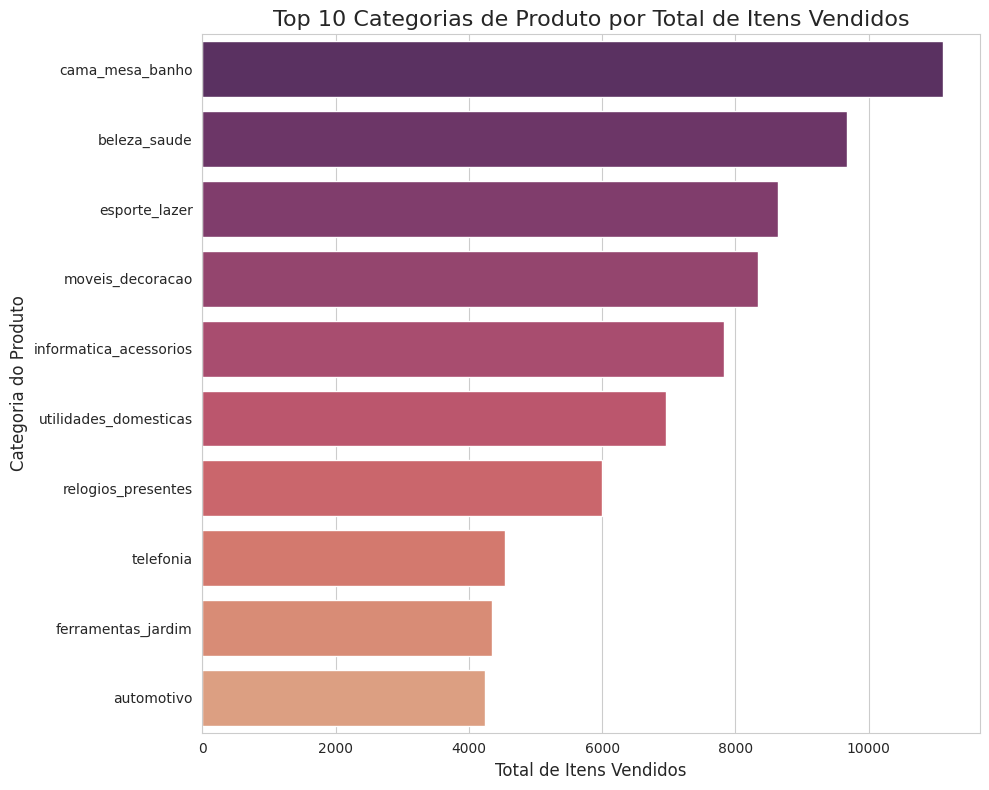

In [ ]:
top_10_categorias = contagem_por_categoria.head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

sns.barplot(
    x='Total_Itens_Vendidos',
    y='Categoria',
    data=top_10_categorias,
    palette='flare_r'
)
plt.title('Top 10 Categorias de Produto por Total de Itens Vendidos', fontsize=16)
plt.xlabel('Total de Itens Vendidos', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
plt.tight_layout()
plt.show()

###Quanto cada estado contribuiu nesse hanking?

In [ ]:
# 1. Merge de Pedidos e Clientes (para ter o Estado do cliente)
df_temp = data[['order_id', 'customer_id']].merge(
    customers[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

# 2. Merge com Itens (para ter o product_id)
df_completo = pedidos[['order_id', 'product_id']].merge(
    df_temp,
    on='order_id',
    how='left'
)

# 3. Merge com Produtos (para ter o nome da Categoria)
df_final_vendas = df_completo.merge(
    products[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

# Limpeza: Renomear para facilitar
df_final_vendas.rename(columns={'customer_state': 'Estado', 'product_category_name': 'Categoria'}, inplace=True)

print("DataFrame 'df_final_vendas' criado com sucesso!")
print(df_final_vendas.head())

DataFrame 'df_final_vendas' criado com sucesso!
                           order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

                        customer_id Estado           Categoria  
0  3ce436f183e68e07877b285a838db11a     RJ          cool_stuff  
1  f6dd3ec061db4e3987629fe6b26e5cce     SP            pet_shop  
2  6489ae5e4333f3693df5ad4372dab6d3     MG    moveis_decoracao  
3  d4eb9395c8c0431ee92fce09860c5a06     SP          perfumaria  
4  58dbd0b2d70206bf40e62cd34e84d795     SP  ferramentas_jardim  


In [ ]:
top_10_categorias_nomes = df_final_vendas['Categoria'].value_counts().nlargest(10).index
df_top_categorias = df_final_vendas[df_final_vendas['Categoria'].isin(top_10_categorias_nomes)].copy()

top_5_estados_nomes = contagem_por_estado.head(5)['Estado'].tolist()

df_top_categorias['Estado_Agrupado'] = df_top_categorias['Estado'].apply(
    lambda x: x if x in top_5_estados_nomes else 'Outros Estados'
)

print("--- Verificação dos Dados para Empilhamento (Top 10 Categorias): ---")
print(df_top_categorias['Categoria'].value_counts().head(10))

--- Verificação dos Dados para Empilhamento (Top 10 Categorias): ---
Categoria
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64


In [ ]:
# Contar o número de itens vendidos (usando a contagem de order_id como peso)
df_agrupado_final = df_top_categorias.groupby(['Categoria', 'Estado_Agrupado']).size().reset_index(name='Total_Itens')

# Para ordenar as barras verticais no gráfico, vamos ordenar a Categoria pelo Total_Itens
ordem_categorias = df_agrupado_final.groupby('Categoria')['Total_Itens'].sum().sort_values(ascending=False).index

print("\n--- Estrutura Final do Agrupamento (Primeiras linhas): ---")
print(df_agrupado_final.head())


--- Estrutura Final do Agrupamento (Primeiras linhas): ---
    Categoria Estado_Agrupado  Total_Itens
0  automotivo              MG          513
1  automotivo  Outros Estados         1111
2  automotivo              PR          234
3  automotivo              RJ          442
4  automotivo              RS          188


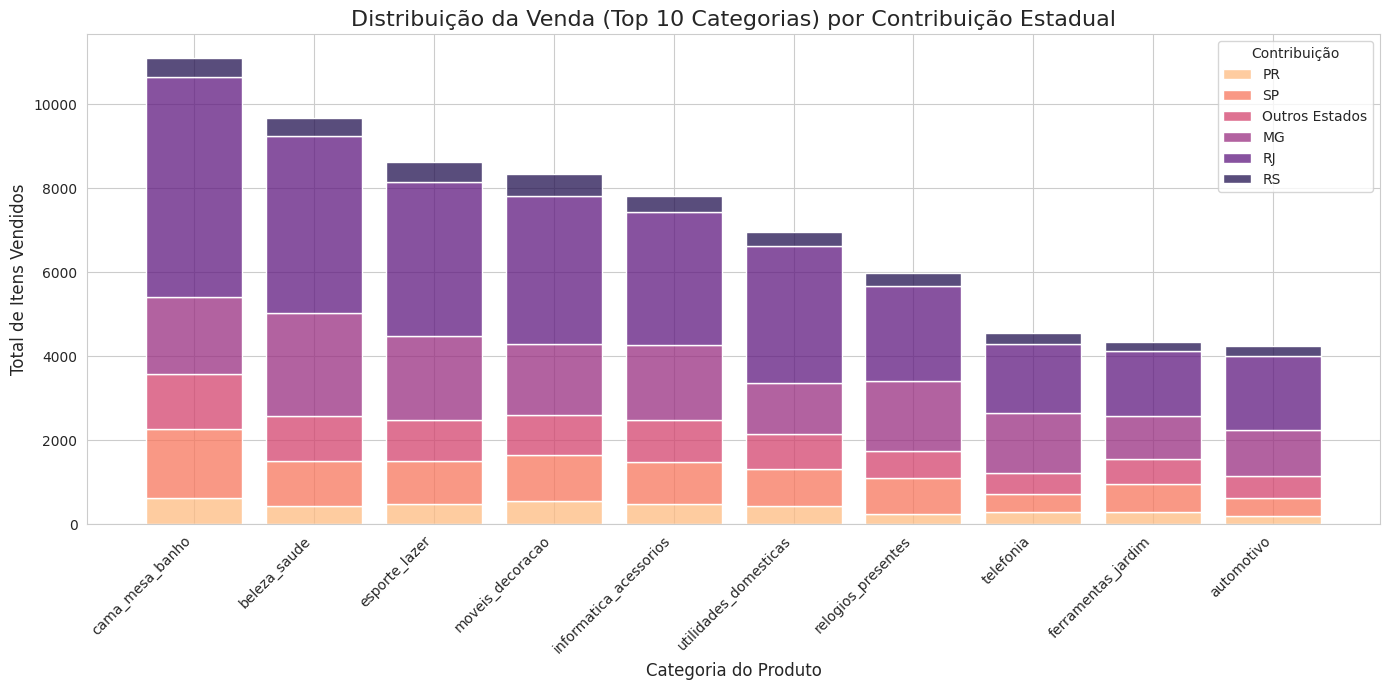

In [ ]:
df_agrupado_final['Categoria'] = pd.Categorical(
    df_agrupado_final['Categoria'],
    categories=ordem_categorias,
    ordered=True
)
df_agrupado_final = df_agrupado_final.sort_values(by='Categoria')

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))


sns.histplot(
    data=df_agrupado_final,
    x='Categoria',
    weights='Total_Itens',
    hue='Estado_Agrupado', # Variável de cor e legenda
    multiple='stack',      # Comando para empilhar
    palette='magma',       # Paleta de cores roxo/rosa
    shrink=0.8,
)

# Adicionar Título e Rótulos
plt.title('Distribuição da Venda (Top 10 Categorias) por Contribuição Estadual', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Total de Itens Vendidos', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Contribuição', loc='upper right', labels=df_agrupado_final['Estado_Agrupado'].unique())

plt.tight_layout()
plt.show()

##Pergunta 4. Quais são os 5 tipos de itens mais vendidos em dezembro?

In [ ]:
if 'order_purchase_timestamp' not in df_final_vendas.columns:
    df_temp_data = df_final_vendas.merge(
        data[['order_id', 'order_purchase_timestamp']],
        on='order_id',
        how='left'
    )
    df_final_vendas = df_temp_data.copy()

df_final_vendas['Mes'] = pd.to_datetime(df_final_vendas['order_purchase_timestamp']).dt.month

df_dezembro = df_final_vendas[df_final_vendas['Mes'] == 12].copy()

print(f"Total de itens vendidos em Dezembro: {len(df_dezembro)}")

Total de itens vendidos em Dezembro: 6309


In [ ]:
vendas_dezembro_por_categoria = df_dezembro.groupby('Categoria').size().reset_index(name='Total_Itens_Vendidos')
vendas_dezembro_por_categoria.columns = ['Categoria', 'Total_Itens_Vendidos']
vendas_dezembro_por_categoria = vendas_dezembro_por_categoria.sort_values(by='Total_Itens_Vendidos', ascending=False)

top_5_dezembro = vendas_dezembro_por_categoria.head(5)

print("\n--- Top 5 Itens Mais Vendidos em Dezembro: ---")
print(top_5_dezembro)


--- Top 5 Itens Mais Vendidos em Dezembro: ---
           Categoria  Total_Itens_Vendidos
12   cama_mesa_banho                   552
29     esporte_lazer                   493
10      beleza_saude                   466
11        brinquedos                   445
48  moveis_decoracao                   390


/tmp/ipython-input-2496610363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


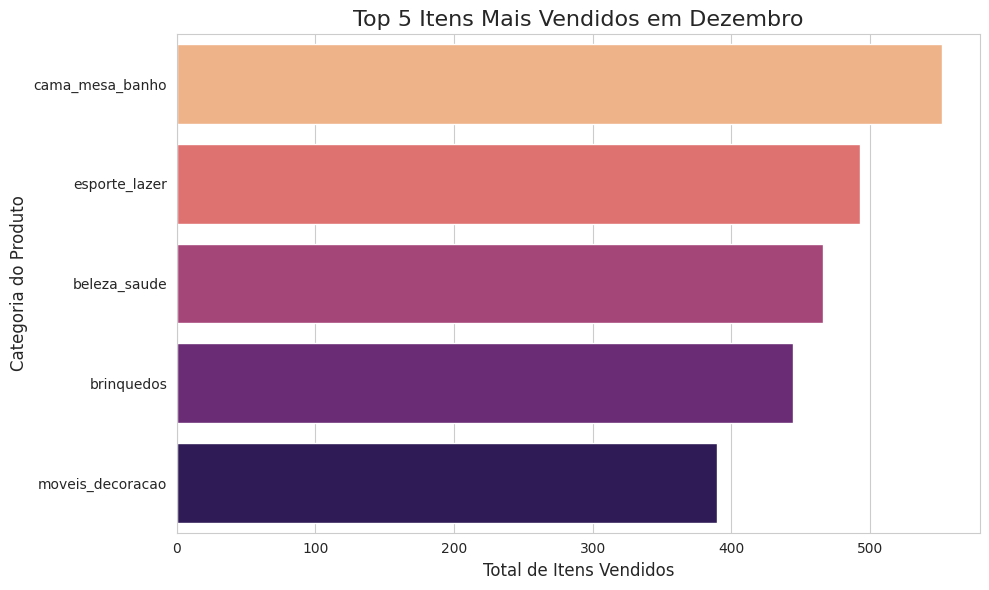

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(
    x='Total_Itens_Vendidos',
    y='Categoria',
    data=top_5_dezembro,
    palette='magma_r'
)

plt.title('Top 5 Itens Mais Vendidos em Dezembro', fontsize=16)
plt.xlabel('Total de Itens Vendidos', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
plt.tight_layout()
plt.show()

##Utilizando o Plotly

In [ ]:
import plotly.express as px

fig_faturamento = px.line(
    faturamento_trimestral,
    x='Rotulo_Trimestre',
    y='Faturamento_Total',
    title='Evolução do Faturamento por Trimestre (2016-2018)',
    markers=True,
    line_shape='linear',
    color_discrete_sequence=['#FF69B4']
)

fig_faturamento.update_traces(
    line=dict(width=1.5),
    marker=dict(size=8, color='#FF69B4')
)

fig_faturamento.update_layout(
    xaxis_title='Trimestre (Mês Inicial)',
    yaxis_title='Faturamento Total (R$)',
)

fig_faturamento.show()

In [ ]:
import plotly.express as px

# O DataFrame 'contagem_por_estado' e 'top_10_estados' estão definidos nos passos anteriores.
top_10_estados = contagem_por_estado.head(10).copy()

# Criação do Gráfico de Barras Horizontais
fig_estados = px.bar(
    top_10_estados,
    x='Total_Pedidos',
    y='Estado',
    title='Top 10 Estados Brasileiros por Número de Pedidos (2016-2018)',
    orientation='h',
    color='Total_Pedidos',
    color_continuous_scale=px.colors.sequential.PuRd, # Paleta de lilás/rosa
)

# Ajustes Estéticos e Corretivos (Fundo Branco e Linhas de Grade Cinza Claro)
fig_estados.update_layout(
    plot_bgcolor='white', # Fundo do gráfico em branco

    # 1. UNIFICAÇÃO DO EIXO X (Garante a grade cinza)
    xaxis=dict(
        showgrid=True,
        gridcolor='#D3D3D3', # Cor da linha de grade em cinza claro
        linecolor='black',
        linewidth=1
    ),

    # 2. UNIFICAÇÃO DO EIXO Y (Garante a ordem e o fundo limpo)
    yaxis=dict(
        categoryorder='total ascending', # Propriedade que garante a ordem do maior para o menor
        showgrid=False, # Remove a grade do eixo Y
        linecolor='black',
        linewidth=1
    )
)

fig_estados.show()

In [ ]:
fig_categorias = px.bar(
    df_agrupado_final,
    x='Categoria',
    y='Total_Itens',
    color='Estado_Agrupado', # Variável de cor e empilhamento
    title='Distribuição da Venda (Top 10 Categorias) por Contribuição Estadual',
    labels={'Total_Itens': 'Total de Itens Vendidos', 'Estado_Agrupado': 'Contribuição Estadual'},
    category_orders={"Categoria": ordem_categorias}, # Usa a ordem das categorias calculada anteriormente
    color_discrete_sequence=px.colors.sequential.RdPu # Alterado para degradê de roxo/rosa (Red-Purple)
)

# Ajuste de layout para rótulos
fig_categorias.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Categoria do Produto',
    yaxis_title='Total de Itens Vendidos'
)

fig_categorias.show()

In [ ]:
top_10_estados = contagem_por_estado.head(10).copy()

fig_estados = px.bar(
    top_10_estados,
    x='Total_Pedidos',
    y='Estado',
    title='Top 10 Estados Brasileiros por Número de Pedidos (2016-2018)',
    orientation='h',
    color='Total_Pedidos',
    color_continuous_scale=px.colors.sequential.PuRd, # Paleta de lilás/rosa
)

fig_estados.update_layout(
    plot_bgcolor='white', # Fundo do gráfico em branco

    xaxis=dict(
        showgrid=True,
        gridcolor='#D3D3D3', # Cor da linha de grade em cinza claro
        linecolor='black',
        linewidth=1,
        # Você pode adicionar outras propriedades do eixo X aqui se precisar!
    ),

    yaxis=dict(
        categoryorder='total ascending', # Propriedade que garante a ordem do maior para o menor
        showgrid=False, # Remove a grade do eixo Y
        linecolor='black',
        linewidth=1,
    )
)

fig_estados.show()


##📝 Conclusão da Análise de Padrões de E-commerce (2016-2018)

**A análise exploratória dos dados de e-commerce brasileiros (Olist, 2016-2018) permitiu identificar tendências críticas no crescimento do mercado, na distribuição geográfica do consumo e na preferência por categorias de produtos.**

**1. Dinâmica do Faturamento e Cenário Histórico**

A evolução do faturamento revelou um período de crescimento exponencial culminando entre o Terceiro Trimestre de 2017 e o Segundo Trimestre de 2018, seguido por uma queda abrupta no volume de vendas

O pico de faturamento sugere uma popularização acelerada do e-commerce no país naquele período. A queda subsequente, embora pareça drástica, deve ser analisada sob o contexto da estabilização natural do mercado e, crucialmente, pode ser um reflexo precoce das incertezas econômicas que antecederam o impacto total da pandemia de *COVID-19*, mesmo que a análise se encerre em 2018.

**2. Concentração Geográfica e Socioeconomia**

A distribuição geográfica do consumo confirmou o esperado domínio da Região Sudeste, com **São Paulo** liderando o ranking de pedidos com uma margem significativa.

Esta concentração é diretamente explicada por fatores macroeconômicos e demográficos:

* Poder de Compra: A maior renda per capita e o maior Produto Interno Bruto (PIB) do estado concentram a maior parte do potencial de consumo.

* Logística e População: A alta densidade populacional e a infraestrutura logística consolidada da região facilitam tanto a compra quanto a entrega.

**3. Preferência de Consumo e Sazonalidade**

As categorias de produtos mais vendidas ofereceram insights surpreendentes:

* Liderança de cama_mesa_banho:

A posição de topo desta categoria, acima de eletrônicos ou moda, sugere que as lojas que contribuíram para o dataset do Kaggle possuem um forte mix de produtos focado em itens domésticos de alto volume.

Se a base de dados for composta por grandes varejistas (como Americanas ou Magazine Luiza), este dado é consistente com o tipo de inventário mais comum.

**Vendas de Dezembro**:

A análise sazonal (Dezembro) reforçou essa tendência, com cama_mesa_banho no topo. No entanto, a ascensão de esporte_lazer ao segundo lugar confirma a influência da época, associada às férias, ao verão e às compras de presentes de Natal.

###Conclusão Final
O projeto demonstra que, embora o e-commerce brasileiro tenha experimentado um crescimento robusto e concentrado no Sudeste, a popularidade das categorias de produtos é fortemente influenciada pela estrutura dos grandes varejistas. Os padrões sazonais (como o pico de esporte_lazer em Dezembro) confirmam a utilidade dos dados para o planejamento de marketing e inventário das empresas.